# Сравнение полученных решений
В проекте реализованы следующие решения:
* [Решение №1 - Фильтрация](./Solution1.ipynb)
* [Решение №2 - Равное голосование](./Solution2.ipynb)

В данном файле будет проведено сравнение полученных результатов.

## Импорт реализованных алгоритмов

In [1]:
from src import *

## Группировка данных

In [2]:
dataset_path = '../data/sample.json'
groups1 = solution1.group_by_filtering(dataset_path)  # Поиск групп по алгоритму решения №1

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

In [3]:
groups2 = solution2.group_by_equal_vote(dataset_path) # Поиск групп по алгоритму решения №2

  0%|          | 0/412 [00:00<?, ?it/s]

## Полученные группы

In [4]:
groups1 ## Решение 1

[['Никто туда больше не ходит.', 'Никто больше туда не ходит.'],
 ['У него с собой не было тогда денег.',
  'У него тогда не было с собой денег.'],
 ['Я больше не хочу с тобой играть.', 'Я не хочу с тобой больше играть.'],
 ['Что сделал Том с деньгами?', 'Что сделёл Том с деньгами?'],
 ['Том меня сейчас хочет видеть?', 'Том хочет меня сейчас видеть?'],
 ['Я его больше не увижу.', 'Я больше его не увижу.'],
 ['Том и Мэри объявили сегодня о своей пбмолвке.',
  'Том и Мэри объявили сегодня о своей помолвке.'],
 ['Я не могу больше ждать.', 'Я больше не могу ждать.'],
 ['Мост очень длинный и высокий.', 'Мост очень длинный и очень высокий.'],
 ['Пусть свиньи это едят.', 'Пусть это свиньи едят.'],
 ['Ты хотел мне рассказать о свободе?', 'Ты хотел рассказать мне о свободе?'],
 ['Что пел Джон на сцене?', 'Что Джон пел на сцене?'],
 ['Я написал влера письмо.', 'Я написал вчера письмо.'],
 ['Мы не были готовы.', 'Мы были не готовы.'],
 ['Они их только что нашли.', 'Они только что их нашли.'],
 ['

In [5]:
groups2 ## Решение 2

[['Ты нашёл их или нет?'],
 ['Почему она так со мной поступает?'],
 ['Никто туда больше не ходит.', 'Никто больше туда не ходит.'],
 ['У него с собой не было тогда денег.',
  'У него тогда не было с собой денег.'],
 ['Почему они с нами так поступают?'],
 ['Он всю ночь стонал от сильной боли.'],
 ['Я больше не хочу с тобой играть.', 'Я не хочу с тобой больше играть.'],
 ['Тому было тогда всего тринадцать лет.'],
 ['Что сделал Том с деньгами?', 'Что сделёл Том с деньгами?'],
 ['Том меня сейчас хочет видеть?', 'Том хочет меня сейчас видеть?'],
 ['Он даже меня не замечает.'],
 ['Тебе это всё нравится?'],
 ['Я его больше не увижу.', 'Я больше его не увижу.'],
 ['Почему она так с ней поступает?'],
 ['Я хотел бы учиться в Бостоне.'],
 ['Том и Мэри объявили сегодня о своей пбмолвке.',
  'Том и Мэри объявили сегодня о своей помолвке.'],
 ['Том этим сейчас занимается.'],
 ['Я не могу больше ждать.', 'Я больше не могу ждать.'],
 ['Мост очень длинный и высокий.', 'Мост очень длинный и очень высоки

## Сравнение групп по размеру
Рассмотрим количество найденных групп размеров 1, 2 и 3.

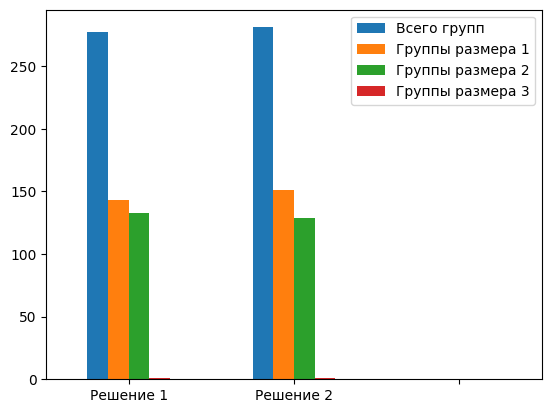

In [6]:
import pandas as pd
import numpy as np

def count_of_size(groups, request_size):
    return len([group for group in groups if len(group) == request_size])

count_data = [
    [len(groups1), count_of_size(groups1, 1), count_of_size(groups1, 2), count_of_size(groups1, 3)],
    [len(groups2), count_of_size(groups2, 1), count_of_size(groups2, 2), count_of_size(groups2, 3)],
    [0, 0, 0, 0]
]

df2 = pd.DataFrame(count_data, columns=["Всего групп", "Группы размера 1", "Группы размера 2", "Группы размера 3"], 
                   index = ['Решение 1', 'Решение 2', ''])
df2.plot.bar(rot = 0);

Можно увидеть, что решения дали похожие результаты.

## Сравнение полученных результатов

In [7]:
# Функция поиска разлиций между найденными наборами групп
def find_difference(group1, group2):
    diff1 = [g for g in group1 if g not in group2]
    diff2 = [g for g in group2 if g not in group1]
    return diff1, diff2

In [8]:
groups1 = [set(g) for g in groups1]
groups2 = [set(g) for g in groups2]
diff1, diff2 = find_difference(groups1, groups2)

#### Наборы, которые выдает решение 1, но не выдает решение 2:

In [9]:
diff1 

[{'Том не живёт в Бостоне.', 'Том сейчас не живёт в Бостоне.'},
 {'Она никогда нам ничего не рассказывает.',
  'Том никогда нам ничего не рассказывает.'},
 {'Многие птицы на зиму улетают на юг.', 'Многие птицы осенью улетают на юг.'},
 {'Я ничего не могу доказать.', 'Я ничего не хочу делать.'}]

In [10]:
len(diff1)

4

 #### Наборы, которые выдает решение 2, но не выдает решение 1:

In [11]:
diff2

[{'Я ничего не хочу делать.'},
 {'Многие птицы осенью улетают на юг.'},
 {'Том не живёт в Бостоне.'},
 {'Она никогда нам ничего не рассказывает.'},
 {'Многие птицы на зиму улетают на юг.'},
 {'Я ничего не могу доказать.'},
 {'Том никогда нам ничего не рассказывает.'},
 {'Том сейчас не живёт в Бостоне.'}]

In [12]:
len(diff2)

8

## Разбор различий решений
* [Решение №1](./Solution1.ipynb): более гибкое решение, которое группирует строки, которые очень похожи друг на друга по смыслу и структуре
* [Решение №2](./Solution2.ipynb): более строгое решение, расчитанное на поиск строк с минимальными отличиями по смыслу и структуре.


# Вывод
В ходе работы было реализовано 2 подхода к решению задачи группировки рерайтов. Оба подхода хорошо справились с задачей на исходном датасете. Полученные результаты очень близки друг к другу и отличаются только в конкретных местах специализации решений.